<h1>Kaksinkertainen eksponentiaalinen tasoitus</h1>

Kaksinkertaista eksponentiaalista tasoitusta kutsutaan myös Holtin malliksi.

Kaksinkertainen eksponentiaalinen tasoitus sopii aikasarjoille, joissa on trendi, mutta ei havaittavaa kausivaihtelua. Eksponentiaalisen tasoituksen mallit (yksinkertainen, kaksinkertainen ja kolminkertainen) ovat erityisen suosittuja liiketaloudessa kysynnän ennustamisessa. Mallit ovat helppokäyttöisiä, nopeasti laskettavissa ja helposti päivitettävissä uusien havaintojen myötä.

Eksponentiaalinen tasoitus löytyy <b>statsmodels.tsa</b>-kirjastosta.

Huomaa, että tässä esimerkissä kaksinkertainen eksoponentiaalinen tasoitus ei ole hyvä malli, koska aikasarjassa on selkeä kausivaihtelu, jonka malli jättää huomiotta!

Lisätietoa https://tilastoapu.wordpress.com/2018/08/30/aikasarjaennustaminen-2/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')
%matplotlib inline

<h2>Aikasarjaan tutustuminen</h2>

In [2]:
df = pd.read_excel('http://taanila.fi/aikasarja.xlsx')
df.head()

,Vuosineljännes,Kysyntä
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [3]:
# Aikaleimat indeksiin
# to_datetime muuntaa merkkijonomuotoisen tiedon aikaleimoiksi
# format mahdollistaa erilaisten esitysmuotojen tunnistamisen aikaleimoiksi
df.index = pd.to_datetime(df['Vuosineljännes'], format = "%Y-%m-%d")

# Pudotetaan tarpeettomaksi käynyt sarake pois
df = df.drop('Vuosineljännes', axis = 1)
df.head()

,Kysyntä
Vuosineljännes,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450


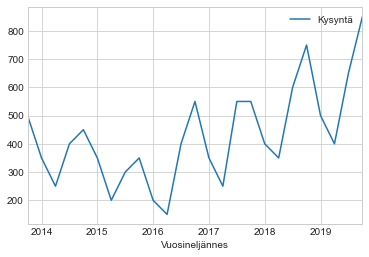

In [4]:
df.plot()

<h2>Mallin sovitus</h2>

Ennustemalli sovitetaan (<b>fit()</b>) dataan.
Tuloksena saadaan olio (tässä olen antanut oliolle nimeksi <b>malli</b>), joka sisältää monenlaista tietoa mallista.

Trendiin (<b>trend</b>) käytän summamallia (<b>add</b>), jossa trendi on aikasarjaan lisättävä termi. Tämä on suositeltavin vaihtoehto.

<b>freq</b>-parametrille käytän arvoa <b>'Q'</b>, koska kyseessä ovat vuosineljänneksien viimeiset päivät. Lisätietoa <b>freq</b>-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [5]:
malli = ExponentialSmoothing(df['Kysyntä'], trend = 'add', freq='Q').fit()

In [6]:
# malli-olion avulla saan mallin mukaan simuloidut ennusteet (fittedvalues) jo toteutuneille ajankohdille
df['Ennuste'] = malli.fittedvalues
df

,Kysyntä,Ennuste
Vuosineljännes,,
2013-12-31,500,409.956208
2014-03-31,350,438.107318
2014-06-30,250,416.202652
2014-09-30,400,364.378361
2014-12-31,450,365.247689
2015-03-31,350,383.701324
2015-06-30,200,370.428329
2015-09-30,300,312.310586
2015-12-31,350,292.960637


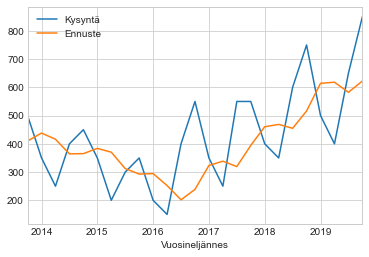

In [7]:
# Alkuperäinen aikasarja ja mallin mukaiset ennusteet samaan kaavioon
df.plot()

In [8]:
# Ennustevirheet (residuaalit) löytyvät malli-oliosta
df['Ennustevirhe'] = malli.resid
df

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2013-12-31,500,409.956208,90.043792
2014-03-31,350,438.107318,-88.107318
2014-06-30,250,416.202652,-166.202652
2014-09-30,400,364.378361,35.621639
2014-12-31,450,365.247689,84.752311
2015-03-31,350,383.701324,-33.701324
2015-06-30,200,370.428329,-170.428329
2015-09-30,300,312.310586,-12.310586
2015-12-31,350,292.960637,57.039363


<h2>Mallin tarkastelu</h2>

Mallin hyvyyden tarkasteluun on monia tapoja. Tässä käytän
<ul><li>ennustevirheiden aikasarjaa viivakaaviona</li>
    <li>ennusteiden ja toteutuneiden arvojen hajontakaaviota</li>
    <li>malliin liittyvää statistiikkaa, jonka saan <b>summary()</b>-toiminnolla.</li>
</ul>
Huomaa erityisesti <b>SSE</b> (sum of squared errors). Mallia laskeva algoritmi yrittää saada SSE:n mahdollisimman pieneksi.

Text(0, 0.5, 'Ennustevirhe')

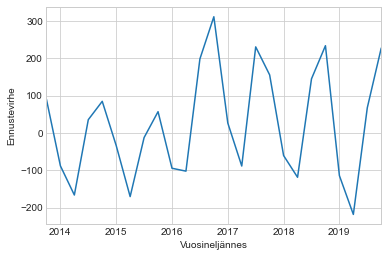

In [9]:
# Ennustevirheet aikasarjana
# On hyvä, jos ennustevirheiden aikasarjan vaihtelu on sattumanvaraista
df['Ennustevirhe'].plot()
plt.ylabel('Ennustevirhe')

Text(0, 0.5, 'Toteutunut kysyntä')

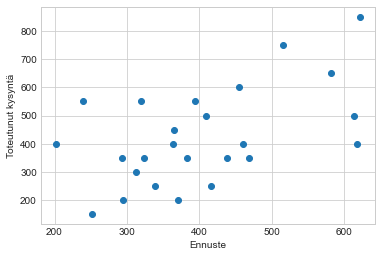

In [10]:
# Ennusteiden ja toteutuneiden kysyntöjen hajontakaavio
# Ennustemalli on sitä parempi, mitä paremmin pisteet seuraavat suoraa viivaa
# vasemmasta alakulmasta oikeaan yläkulmaan
plt.scatter(x = df['Ennuste'], y = df['Kysyntä'])
plt.xlabel('Ennuste')
plt.ylabel('Toteutunut kysyntä')

In [11]:
malli.summary()

Dep. Variable:,endog,No. Observations:,25
Model:,ExponentialSmoothing,SSE,537583.104
Optimized:,True,AIC,257.399
Trend:,Additive,BIC,262.275
Seasonal:,None,AICC,262.066
Seasonal Periods:,None,Date:,"Mon, 21 Dec 2020"
Box-Cox:,False,Time:,16:00:01
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2500511,alpha,True
smoothing_slope,0.2500485,beta,True


<h2>Ennusteiden laskeminen</h2>

Ennustettavien ajankohtien aikaleimojen määrittämiseksi:
<ul><li>Ensimmäisen ennustettavan ajankohdan aikaleiman täytyy olla aikasarjan viimeisintä aikaleimaa seuraava aikaleima.</li>
    <li>Ennustettavien ajankohtien lukumäärän voin määrittää <b>periods</b>-parametrilla.</li>
    <li>Ennustettavien ajankohtien frekvenssin on oltava sama kuin mallia sovitettaessa käytetty <b>freq</b>-parametrin arvo.</li></ul>
        
Lisätietoa <b>freq</b>-parametrin mahdollisista arvoista https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [12]:
#Tarkistan viimeisen aikaleiman
df.tail()

,Kysyntä,Ennuste,Ennustevirhe
Vuosineljännes,,,
2018-12-31,750,516.212041,233.787959
2019-03-31,500,614.282726,-114.282726
2019-06-30,400,618.172447,-218.172447
2019-09-30,650,582.443223,67.556777
2019-12-31,850,622.384879,227.615121


In [13]:
# Ennustettavien ajankohtien aikaleimat (alkupäivänä aikasarjan viimeistä aikaleimaa seuraava aikaleima)
index = pd.date_range('2020-03-31', periods = 8, freq = 'Q')

# Ennusteet kahdeksalle vuosineljännekselle
ennusteet = malli.forecast(8)

# Ennusteet dataframeen
df_ennuste = pd.DataFrame(data = ennusteet, index = index, 
                          columns = ['Ennuste'])
df_ennuste

,Ennuste
2020-03-31,716.580907
2020-06-30,753.861529
2020-09-30,791.142151
2020-12-31,828.422773
2021-03-31,865.703395
2021-06-30,902.984017
2021-09-30,940.264639
2021-12-31,977.545261


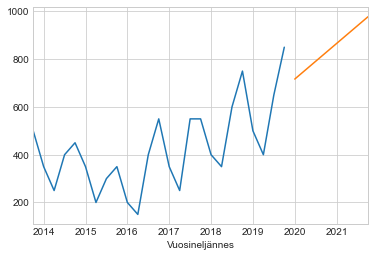

In [14]:
# Viivakaavio havainnoista
df['Kysyntä'].plot()

# Ennusteet kaavioon
df_ennuste['Ennuste'].plot()